# Various recipes (e.g. resolution reduction, etc.)

In [1]:
import orcs.core
import matplotlib.pyplot as pl
import numpy as np
import scipy.fft

<frozen importlib._bootstrap>:241: RuntimeWarning: gvar._svec_smat.smat size changed, may indicate binary incompatibility. Expected 248 from C header, got 464 from PyObject


In [2]:
cube = orcs.core.SpectralCube('data/M1_2022_SN3.merged.cm1.hdf5')

dev.0624|INFO| CFHT version
dev.0624|INFO| Cube is level 2.5
dev.0624|INFO| shape: (2048, 2064, 847)
dev.0624|INFO| wavenumber calibration: True
dev.0624|INFO| flux calibration: True
dev.0624|INFO| wcs calibration: True


## reduce the resolution of a spectrum

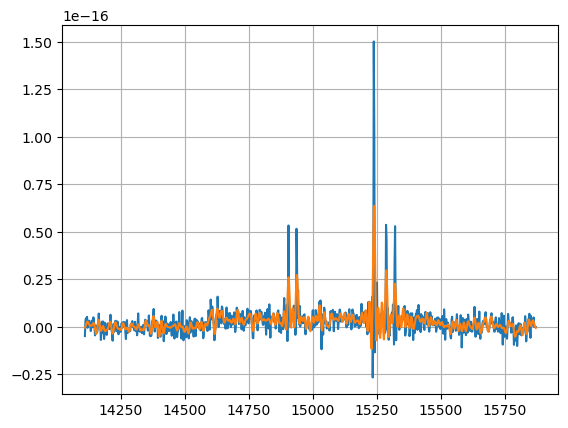

In [3]:
# reduce the resolution of a spectrum by half

REDUCTION = 0.5

spec = cube.get_spectrum(1000,1000)
spec.plot()

# inverse transform
zp_spec = np.concatenate([spec.data, spec.data[::-1]])
spec_ifft = scipy.fft.ifft(zp_spec)
spec_ifft = np.roll(spec_ifft, spec.data.size)

# apply window to reduce resolution
w = np.zeros(spec_ifft.size, dtype=float)
ncut = int(REDUCTION / 2 * spec_ifft.size) # remove half data (2*0.25, on each side)

w[spec.params.zpd_index + ncut:-(ncut + spec.params.zpd_index)] = 1
spec_ifft *= w
spec_ifft = np.roll(spec_ifft, -spec.data.size)

# forward transform
spec.data = scipy.fft.fft(spec_ifft)[:spec.dimx]

spec.plot()
pl.grid()